## 1. 관심있는 주제


### 지하철 역별, 일별, 시간대별 승하차 인원 수

- 선정이유
    - 제가 관심있는 주제는 저의 개인적인 경험에서 나온 지하철 혼잡도 분석 및 예측입니다.
    - 잠실 새내역 에서 아르바이트를 마치고 기숙사로 복귀할때 저는 2호선 외선 순환방향을 탈 것인지 내선순환 방향을 탈 것인지 항상 고민했었습니다. 예를 들어 야구경기가 있는 날이면 종합운동장역에서 오는 사람들을 피하기 위하여 내선순환행을 타는 선택을 하는 등 지하철이 혼잡해지는 상황을 피하기 위하여 노력을 했던 경험이 있습니다. 
    - 지하철 역, 일, 시간대 별 승하차 인원 수를 분석한다면 우리는 언제, 어느역에서, 어떠한 이유 때문에 지하철의 혼잡도가 높아지는 지 분석하고 예측해 볼 수 있을 것입니다.
    - 예측된 데이터는 차후 길찾기 프로그램에서 더 효율적이고 혼잡도가 낮은 지하철 이용을 원하는 사람들에게 도움이 될 것입니다.

## 2. 타이타닉 데이터 EDA + 전처리

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv("Titanic-Dataset.csv")

In [169]:
## 데이터 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [172]:
# 차원 확인
df.shape

(891, 12)

In [173]:
# 결측값 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [175]:
df[df.duplicated()]
# 중복행 없음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


- 결측치 처리


In [176]:
## Age 평균 대체
df["Age"] = df["Age"].fillna(df["Age"].mean())

df[["Age"]].isnull().sum()

Age    0
dtype: int64

In [177]:
# Cabin
df["Cabin"].str[:1].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [178]:
# C등급의 객실이 가장 많은 것을 확인할 수 있음
df["Cabin"] = df["Cabin"].fillna("C")

df["Cabin"].isnull().sum()

0

In [179]:
# Embarked : (Port of Embarkation / C = Cherbourg, Q = Queenstown, S = Southampton)
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [180]:
## Southampton 이 최빈값
df["Embarked"] = df["Embarked"].fillna("S")

In [181]:
# 결측치 처리완료
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 변수별 특징확인하기

- 나이대 / 성별 / 승객등급 / 탑승항구 / 동승자수 별 생존률

<Axes: >

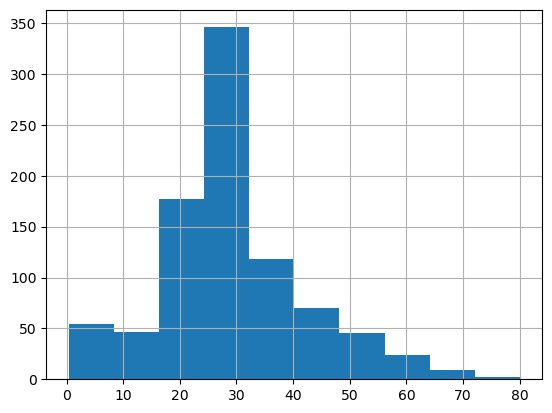

In [182]:
df["Age"].hist()

In [183]:
df["Sex"].value_counts()
# 남성이 더 많이 탑승

Sex
male      577
female    314
Name: count, dtype: int64

In [184]:
df["Pclass"].value_counts()
# 3등석 1등석 2등석 순으로 많음

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [185]:
df["Embarked"].value_counts()
# Southampton에서 가장 많이 탑승

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [186]:
## 성별 생존률
df[df["Sex"] == "female"]["Survived"].value_counts()

Survived
1    233
0     81
Name: count, dtype: int64

In [187]:
df[df["Sex"] == "male"]["Survived"].value_counts()

Survived
0    468
1    109
Name: count, dtype: int64

In [188]:
survived = sum(df["Survived"])
print(f"전체 생존률 : {round(survived / df.shape[0] * 100, 2)}%")
print(f"여성 생존률 : {round(233/314 * 100, 2)}%")
print(f"남성 생존률 : {round(109/577 * 100, 2)}%")

전체 생존률 : 38.38%
여성 생존률 : 74.2%
남성 생존률 : 18.89%


In [189]:
# 여성보다 남성의 생존률이 낮음

# 모든 데이터를 이렇식으로 확인하기에는 시간이 많이 소요되므로 groupby 사용

In [190]:
def ratio(x):
    z = x.sum()/x.count()
    return(z)

In [191]:
df.groupby("Sex")[["Survived"]].agg(ratio)
## 여성보다 남성의 생존률이 낮음

,Survived
Sex,
female,0.742038
male,0.188908


In [192]:
df.groupby("Embarked")[["Survived"]].agg(ratio)
## 특정항구 (Cherbourg)에서 탑승한 승객의 생존률이 전체 생존률(38.38%)에 비해 유의미하게 높음

## 탑승자수
# S    646
# C    168
# Q     77

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [217]:
df["Age_group"] = ["Under 20" if i < 20 else "Over 55" if i > 60 else "20~60" for i in df["Age"]]
df.groupby("Age_group")[["Survived"]].agg(ratio)

## 주니어 그룹 (20세 미만) 그룹에서 높은 생존률을 보이고, 시니어 그룹(55세 이상)에서 낮은 생존률을 보임

,Survived
Age_group,
20~60,0.365957
Over 55,0.227273
Under 20,0.481707


In [194]:
df.groupby("Pclass")[["Survived"]].agg(ratio)
## 티켓 등급별로 생존률이 차이나고 1등석 승객에 비해 3등석 승객의 생존률이 낮음

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [196]:
## SibSp : 함께 탑승한 형제, 배우자의 수 (본인 제외)
## Parch : 함께 탑승한 부모, 자녀 수 (본인 제외)
df["Party"] = df["SibSp"] + df["Parch"]
df[["Party"]]

,Party
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,3
889,0


In [200]:
df["Party"].value_counts()
## 혼자 탑승한 승객이 많음

Party
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [202]:
df.groupby("Party")[["Survived"]].agg(ratio)
## 전반적으로 혼자 탑승한 승객이 생존률이 낮고, 가족단위의 승객 (동승자 1 ~ 3)의 생존률이 높음
## 4인 이상의 경우 표본수가 적기도 하고 유의미한 수치인지는 확인되지 않음

,Survived
Party,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


<Axes: xlabel='SibSp', ylabel='count'>

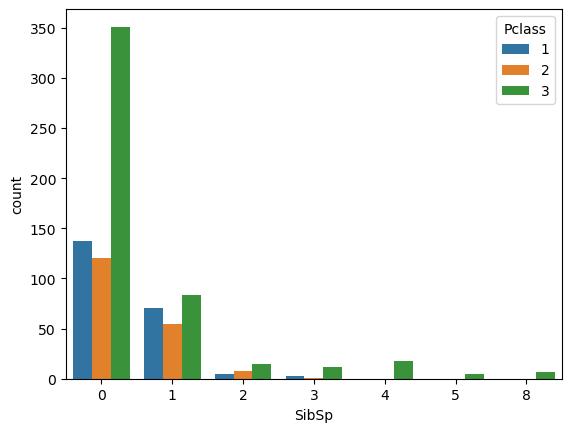

In [207]:
sns.countplot(data=df, x='SibSp', hue='Pclass')

<Axes: xlabel='SibSp', ylabel='count'>

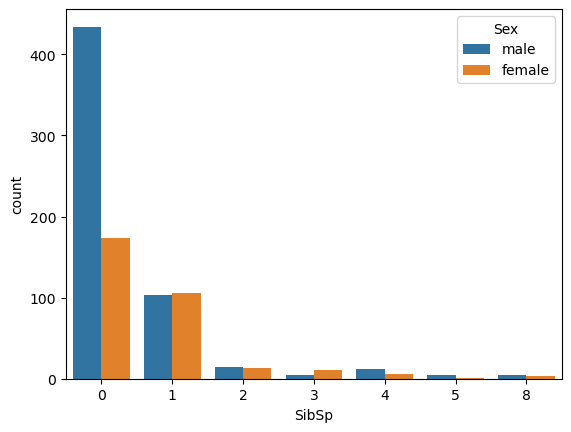

In [208]:
sns.countplot(data=df, x='SibSp', hue='Sex')

In [218]:
## 위 그래프로 3등석에 홀로 탑승한 남성 승객들의 생존률이 낮다는 것을 예측해 볼 수 있다.